In [172]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import linear_model

In [173]:
study_results = pd.read_csv("Codingbootcamp/Study_results.csv")
Mouse_metadata = pd.read_csv("Codingbootcamp/Mouse_metadata.csv")

In [216]:
combined_data = pd.merge(df1,df2, how = "outer", on = "Mouse ID")
combined_data = combined_data.sort_values(by = "Timepoint", ascending = 1)

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [175]:
# Summary statistics

group = combined_data.groupby("Drug Regimen")
mean = group["Tumor Volume (mm3)"].mean()
median = group["Tumor Volume (mm3)"].median()
variance = group["Tumor Volume (mm3)"].var()
STD = group["Tumor Volume (mm3)"].std()
std_error = group["Tumor Volume (mm3)"].sem()
Statistics_summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":STD,"Tumor Volume Std. Err.":std_error})
Statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


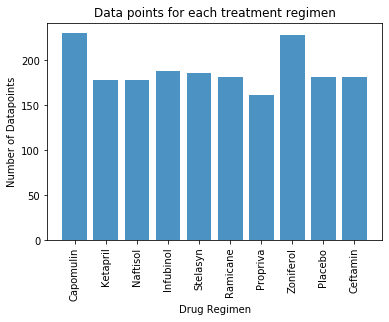

In [177]:
#Bar Chart using Pyplot

y_axis = group["Drug Regimen"].count()
Drug_Regimen = df3["Drug Regimen"].unique()
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis , alpha=0.8, align="center")
plt.xticks(tick_locations, Drug_Regimen, rotation = "vertical")


plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Datapoints")
plt.show()

Text(0, 0.5, 'Number of Datapoints')

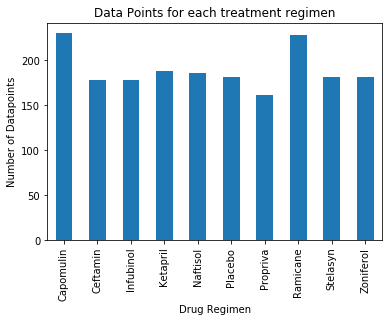

In [217]:
#Bar Chart using DataFrame (Pandas)

count = group["Drug Regimen"].count()

count_chart = count.plot(kind = 'bar')
plt.title("Data Points for each treatment regimen")
plt.ylabel("Number of Datapoints")


Text(0, 0.5, 'Sex')

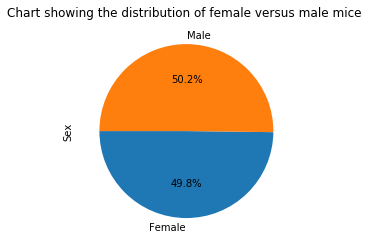

In [8]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot

    
group1 = df3.groupby("Sex")  
count = group1["Mouse ID"].nunique()
labels = ["Female","Male"]
plt.pie(count,labels=labels,autopct="%1.1f%%", startangle=180)
plt.title("Chart showing the distribution of female versus male mice ")
plt.ylabel("Sex")

Text(0.5, 1.0, 'Chart showing the distribution of female versus male mice')

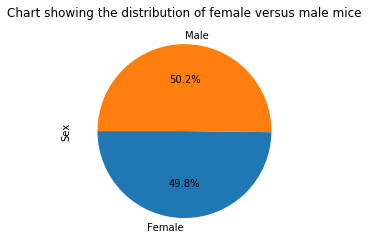

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

count = group1["Mouse ID"].nunique()


count_chart = count.plot(kind = 'pie',autopct='%1.1f%%',startangle=180)
plt.ylabel("Sex")
plt.title("Chart showing the distribution of female versus male mice")

In [218]:
# Get final volume for each regimen by sorting the data by Timepoint and removing duplicate Mouse IDs

Data_Capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
sorted_Data_Capomulin = Data_Capomulin.sort_values(by = "Timepoint", ascending = 0)
Data_Capomulin_unique = sorted_Data_Capomulin.drop_duplicates(subset="Mouse ID", keep='first')
Regimen_1 = Data_Capomulin_unique["Tumor Volume (mm3)"] 

Data_Ramicane = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane",["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
sorted_Data_Ramicane = Data_Ramicane.sort_values(by = "Timepoint", ascending = 0)
Data_Ramicane_unique = sorted_Data_Ramicane.drop_duplicates(subset="Mouse ID", keep='first')
Regimen_2 = Data_Ramicane_unique["Tumor Volume (mm3)"] 

Data_Infubinol = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol",["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
sorted_Data_Infubinol = Data_Infubinol.sort_values(by = "Timepoint", ascending = 0)
Data_Infubinol_unique = sorted_Data_Infubinol.drop_duplicates(subset="Mouse ID", keep='first')
Regimen_3 = Data_Infubinol_unique["Tumor Volume (mm3)"] 

Data_Ceftamin = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin",["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
sorted_Data_Ceftamin = Data_Ceftamin.sort_values(by = "Timepoint", ascending = 0)
Data_Ceftamin_unique = sorted_Data_Ceftamin.drop_duplicates(subset="Mouse ID", keep='first')
Regimen_4 = Data_Ceftamin_unique["Tumor Volume (mm3)"]
#Interquartile Range

#IQR Capomulin
quartiles_1 = Regimen_1.quantile([0.25,0.5,0.75])

lowerq1 = quartiles_1.values[0]
upperq1 = quartiles_1.values[2]
iqr_Capomulin = upperq1-lowerq1

lower_bound1 = lowerq1 - (1.5*iqr_Capomulin)
upper_bound1 = upperq1 + (1.5*iqr_Capomulin)


#IQR Ramicane
quartiles_2 = Regimen_2.quantile([0.25,0.5,0.75])

lowerq2 = quartiles_2.values[0]
upperq2 = quartiles_2.values[2]
iqr_Ramicane = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr_Ramicane)
upper_bound2 = upperq2 + (1.5*iqr_Ramicane)

#IQR Infubinol
quartiles_3 = Regimen_3.quantile([0.25,0.5,0.75])

lowerq3 = quartiles_3.values[0]
upperq3 = quartiles_3.values[2]
iqr_Infubinol = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr_Infubinol)
upper_bound3 = upperq3 + (1.5*iqr_Infubinol)

#IQR Ceftamin
quartiles_4 = Regimen_4.quantile([0.25,0.5,0.75])

lowerq4 = quartiles_4.values[0]
upperq4 = quartiles_4.values[2]
iqr_Ceftamin = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr_Ceftamin)
upper_bound4 = upperq4 + (1.5*iqr_Ceftamin)

print("IQR of Capomulin is {}".format(iqr_Capomulin))
print("Upper limit of Capomulin is {} and lower limit is {}".format(upper_bound1,lower_bound1))
print("--------------------------------------------------------------------------------------")

print("IQR of Ramicane is {}".format(iqr_Ramicane))
print("Upper limit of Ramicane is {} and lower limit is {}".format(upper_bound2,lower_bound2))
print("--------------------------------------------------------------------------------------")

print("IQR of Infubinol is {}".format(iqr_Infubinol))
print("Upper limit of Infubinol is {} and lower limit is {}".format(upper_bound3,lower_bound3))
print("--------------------------------------------------------------------------------------")

print("IQR of Ceftamin is {}".format(iqr_Ceftamin))
print("Upper limit of Ceftamin is {} and lower limit is {}".format(upper_bound4,lower_bound4))
print("--------------------------------------------------------------------------------------")



IQR of Capomulin is 7.781863460000004
Upper limit of Capomulin is 51.83201549 and lower limit is 20.70456164999999
--------------------------------------------------------------------------------------
IQR of Ramicane is 9.098536719999998
Upper limit of Ramicane is 54.30681135 and lower limit is 17.912664470000003
--------------------------------------------------------------------------------------
IQR of Infubinol is 11.477135160000003
Upper limit of Infubinol is 82.74144559000001 and lower limit is 36.83290494999999
--------------------------------------------------------------------------------------
IQR of Ceftamin is 15.577752179999997
Upper limit of Ceftamin is 87.66645829999999 and lower limit is 25.355449580000002
--------------------------------------------------------------------------------------


Text(0, 0.5, 'Final Tumor Volume (mm3)')

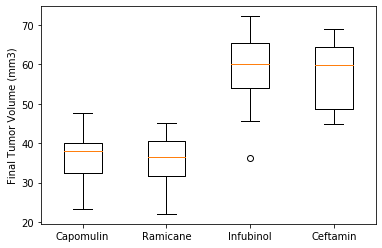

In [227]:
Drug_Regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
x1_values = np.arange(len(Drug_Regimen))
tick_locations1 = [x+1 for x in x1_values]
plt.boxplot ([Regimen_1.values,Regimen_2.values, Regimen_3.values, Regimen_4.values ])
plt.xticks(tick_locations1, Drug_Regimen)
plt.ylabel("Final Tumor Volume (mm3)")



Text(0.5, 1.0, 'Capomulin treatment of mouse I509')

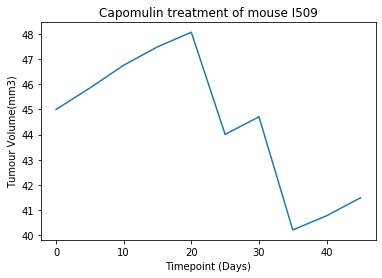

In [228]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

promising_regimen_capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
promising_regimen_capomulin_1mouse = promising_regimen_capomulin.loc[promising_regimen_capomulin["Mouse ID"] == "l509"]

mydata = promising_regimen_capomulin_1mouse[["Tumor Volume (mm3)","Timepoint"]].dropna(how = "any")

plt.plot( mydata["Timepoint"], mydata["Tumor Volume (mm3)"])
plt.show
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumour Volume(mm3)")
plt.title("Capomulin treatment of mouse I509")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

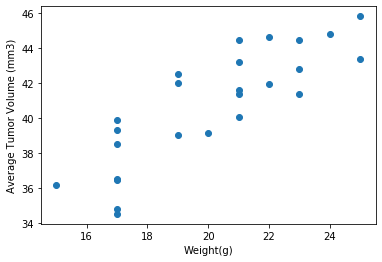

In [229]:
#Scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Tumour_volume = promising_regimen_capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
Mouse_weight = promising_regimen_capomulin.groupby("Mouse ID")["Weight (g)"].first()

Summary = pd.DataFrame({"Tumour volume":Tumour_volume, "Mouse weight":Mouse_weight})
x_values = Summary["Tumour volume"]
y_values = Summary["Mouse weight"]
plt.scatter(y_values, x_values, marker="o", alpha=1)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [230]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between average tumor volume and mice weight is {round(st.pearsonr(x_values,y_values)[0],2)}")



The correlation coefficient between average tumor volume and mice weight is 0.84


Text(50, 15, 'y = 0.74x +-10.15')

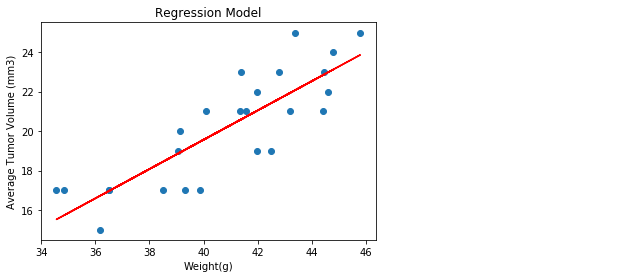

In [231]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Create equation of line to calculate predicted average tumor volume

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values,marker="o", alpha=1)

plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r-")

plt.title("Regression Model")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,15),fontsize=15,color="red")